In [1]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("Titanic-Dataset.csv")
display(train.head(5))
print(train.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# 行数と列数を取得
rows, cols = train.shape

print(f"データの総数（行数）: {rows}")
print(f"項目の数（列数）: {cols}")

データの総数（行数）: 891
項目の数（列数）: 12


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#欠損値の処理
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train["Cabin"] = train["Cabin"].fillna("Unknown")
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(train["Title"].value_counts())
train.isnull().sum()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1663546660.py:4: SyntaxWarning: invalid escape sequence '\.'
  train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
title_mapping = {'Ms': 'Miss',
    'Dona': 'Mrs',
    'Col': 'Rare',
    'Rev': 'Rare',
    'Dr': 'Rare',
    'Major':'Rare',
    'Mlle':"Rare",
    "Don":"Rare",
    "Lady":"Rare",
    "Mme":"Rare",
    "Sir":"Rare",
    "Capt":"Rare",
    "Countess":"Rare",
    "Jonkheer":"Rare"}
train["Title"] = train["Title"].replace(title_mapping)
print(train["Title"].value_counts())


Title
Mr        517
Miss      183
Mrs       125
Master     40
Rare       26
Name: count, dtype: int64


In [7]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
Title            0
dtype: int64


In [8]:
train['Age'] = train['Age'].fillna(train.groupby('Title')['Age'].transform('median'))
train["Embarked"] = train["Embarked"].fillna("Unknown")
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


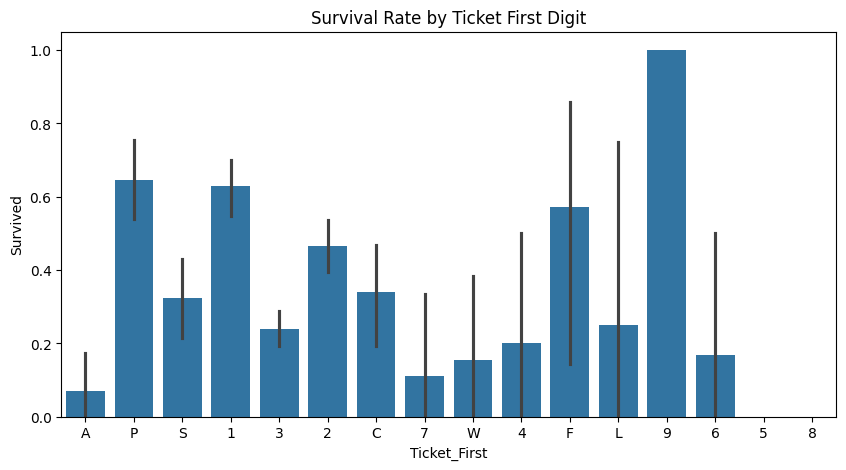

In [9]:
train['Ticket_First'] = train['Ticket'].astype(str).str[0]
train['Ticket_First2'] = train['Ticket'].astype(str).str[:2]
plt.figure(figsize=(10, 5))
sns.barplot(x='Ticket_First', y='Survived', data=train)
plt.title('Survival Rate by Ticket First Digit')
plt.show()

In [10]:
pd.crosstab(train['Ticket_First'], train['Pclass'])

Pclass,1,2,3
Ticket_First,,,
1,131,3,12
2,4,119,60
3,14,5,282
4,0,0,10
5,1,0,2
6,2,0,4
7,0,0,9
8,0,0,2
9,0,0,1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          891 non-null    object 
 11  Embarked       891 non-null    object 
 12  Title          891 non-null    object 
 13  Ticket_First   891 non-null    object 
 14  Ticket_First2  891 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [12]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})


train['Cabin_Deck'] = train['Cabin'].apply(lambda x: x[0])

train = pd.get_dummies(train, columns=['Title', 'Embarked', 'Cabin_Deck', 'Ticket_First'], drop_first=True)

drop_cols = ['Name', 'Ticket', 'Cabin', 'PassengerId', 'Ticket_First2']
train = train.drop(columns=drop_cols)

train = train.astype(float)

# 最終確認
print("--- 最終的なデータ構造 ---")
train.info()
display(train.head())

--- 最終的なデータ構造 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    float64
 1   Pclass            891 non-null    float64
 2   Sex               891 non-null    float64
 3   Age               891 non-null    float64
 4   SibSp             891 non-null    float64
 5   Parch             891 non-null    float64
 6   Fare              891 non-null    float64
 7   Title_Miss        891 non-null    float64
 8   Title_Mr          891 non-null    float64
 9   Title_Mrs         891 non-null    float64
 10  Title_Rare        891 non-null    float64
 11  Embarked_Q        891 non-null    float64
 12  Embarked_S        891 non-null    float64
 13  Embarked_Unknown  891 non-null    float64
 14  Cabin_Deck_B      891 non-null    float64
 15  Cabin_Deck_C      891 non-null    float64
 16  Cabin_Deck_D      891 non-

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,...,Ticket_First_7,Ticket_First_8,Ticket_First_9,Ticket_First_A,Ticket_First_C,Ticket_First_F,Ticket_First_L,Ticket_First_P,Ticket_First_S,Ticket_First_W
0,0.0,3.0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,1.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


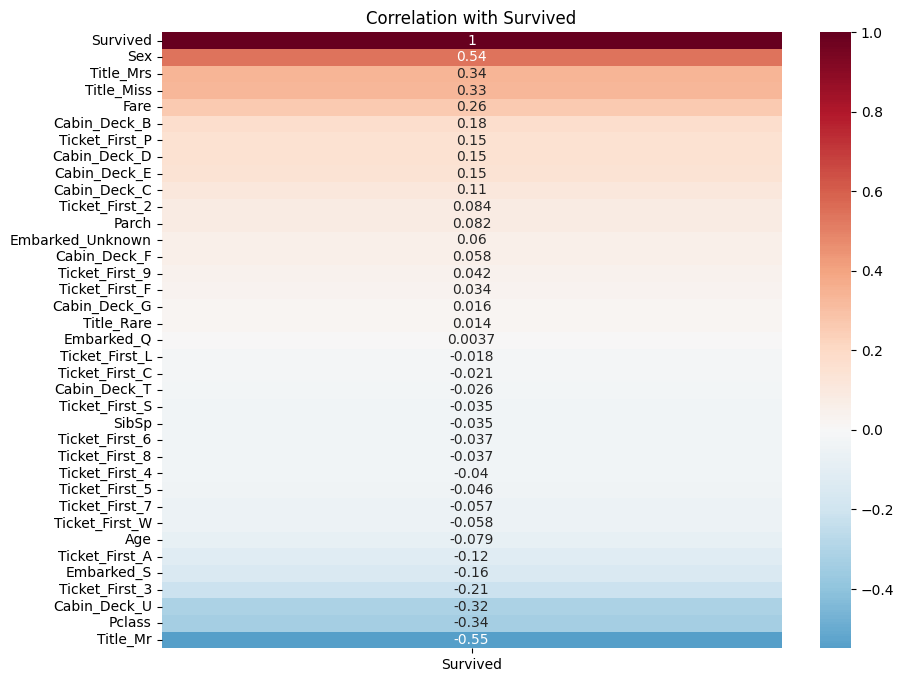

Survived            1.000000
Sex                 0.543351
Title_Mrs           0.339040
Title_Miss          0.329948
Fare                0.257307
Cabin_Deck_B        0.175095
Ticket_First_P      0.151310
Cabin_Deck_D        0.150716
Cabin_Deck_E        0.145321
Cabin_Deck_C        0.114652
Ticket_First_2      0.084305
Parch               0.081629
Embarked_Unknown    0.060095
Cabin_Deck_F        0.057935
Ticket_First_9      0.042470
Ticket_First_F      0.034325
Cabin_Deck_G        0.016040
Title_Rare          0.013988
Embarked_Q          0.003650
Ticket_First_L     -0.018481
Ticket_First_C     -0.021066
Cabin_Deck_T       -0.026456
Ticket_First_S     -0.035049
SibSp              -0.035322
Ticket_First_6     -0.036769
Ticket_First_8     -0.037436
Ticket_First_4     -0.040274
Ticket_First_5     -0.045876
Ticket_First_7     -0.056649
Ticket_First_W     -0.057546
Age                -0.078728
Ticket_First_A     -0.118757
Embarked_S         -0.155660
Ticket_First_3     -0.212428
Cabin_Deck_U  

In [13]:
correlations = train.corr()['Survived'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr()[['Survived']].sort_values(by='Survived', ascending=False),
            annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation with Survived')
plt.show()

print(correlations)

In [14]:
selected_features = correlations[abs(correlations) > 0.05].index.tolist()
selected_features.remove('Survived')
X = train[selected_features]
y = train['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"正解率: {accuracy_score(y_test, y_pred):.2%}")

正解率: 82.12%


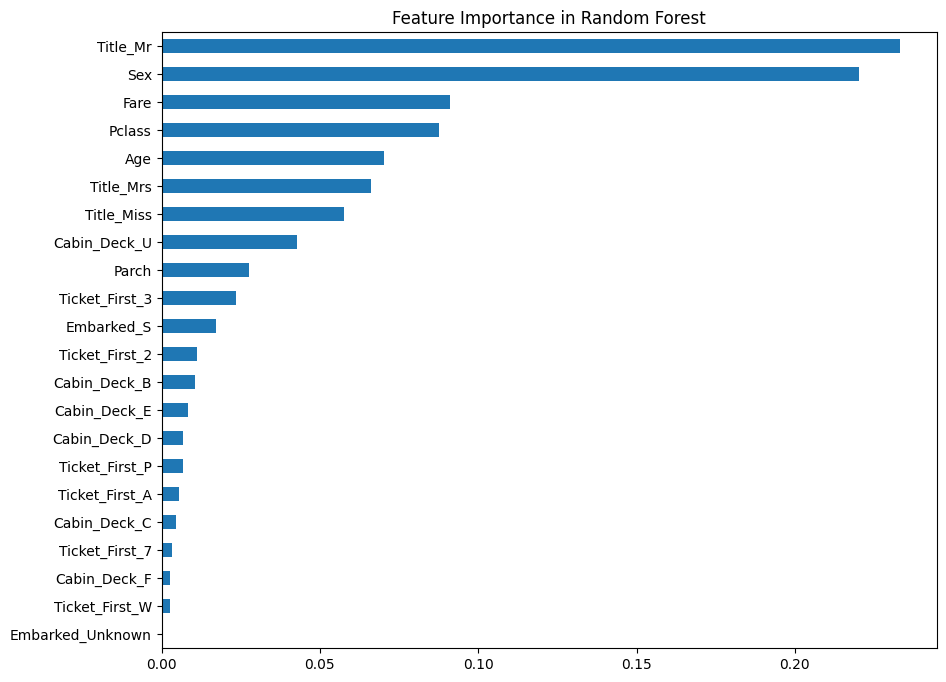

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(model.feature_importances_, index=selected_features).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.title('Feature Importance in Random Forest')
plt.show()

In [16]:
print(importances)

Embarked_Unknown    0.000407
Ticket_First_W      0.002711
Cabin_Deck_F        0.002755
Ticket_First_7      0.003237
Cabin_Deck_C        0.004399
Ticket_First_A      0.005389
Ticket_First_P      0.006833
Cabin_Deck_D        0.006880
Cabin_Deck_E        0.008493
Cabin_Deck_B        0.010600
Ticket_First_2      0.011337
Embarked_S          0.017195
Ticket_First_3      0.023601
Parch               0.027553
Cabin_Deck_U        0.042610
Title_Miss          0.057730
Title_Mrs           0.066132
Age                 0.070091
Pclass              0.087602
Fare                0.091051
Sex                 0.220297
Title_Mr            0.233097
dtype: float64


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] # 特徴量の選び方
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"ベストスコア: {grid_search.best_score_:.2%}")
print(f"ベストパラメータ: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"テストデータでの正解率: {accuracy_score(y_test, y_pred):.2%}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
ベストスコア: 82.86%
ベストパラメータ: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
テストデータでの正解率: 84.36%


In [18]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Test Accuracy: 0.8436


In [19]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm = LGBMClassifier(
    random_state=42,
    importance_type='gain',
    verbose=-1
)

lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

print(f"LightGBM Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")

LightGBM Accuracy: 0.8045


In [20]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

param_grid_lgbm = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'random_state': [42]
}

grid_lgbm = GridSearchCV(
    estimator=LGBMClassifier(verbose=-1),
    param_grid=param_grid_lgbm,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_lgbm.fit(X_train, y_train)

print(f"LGBM ベストスコア: {grid_lgbm.best_score_:.2%}")
print(f"LGBM ベストパラメータ: {grid_lgbm.best_params_}")

y_pred_lgbm = grid_lgbm.best_estimator_.predict(X_test)
print(f"LGBM テスト正解率: {accuracy_score(y_test, y_pred_lgbm):.2%}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
LGBM ベストスコア: 83.28%
LGBM ベストパラメータ: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'num_leaves': 31, 'random_state': 42}
LGBM テスト正解率: 81.56%


In [21]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.01,
    num_leaves=31,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Test Accuracy: 0.8156


In [22]:
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'random_state': [42]
}

grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)

print(f"XGBoost ベストスコア: {grid_xgb.best_score_:.2%}")
print(f"XGBoost ベストパラメータ: {grid_xgb.best_params_}")

y_pred_xgb = grid_xgb.best_estimator_.predict(X_test)
print(f"XGBoost テスト正解率: {accuracy_score(y_test, y_pred_xgb):.2%}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
XGBoost ベストスコア: 83.57%
XGBoost ベストパラメータ: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.8}
XGBoost テスト正解率: 83.80%


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:20:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
xgb_model = XGBClassifier(
    n_estimators=80,      # 木の数
    max_depth=5,           # 木の深さ
    learning_rate=0.05,    # 学習率（少し小さめに設定）
    random_state=42,
    gamma=0.01,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss'  # 警告を消すための設定
)

# 学習
xgb_model.fit(X_train, y_train)

# 予測
y_pred_xgb = xgb_model.predict(X_test)

# 精度確認
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

XGBoost Accuracy: 0.8547


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:20:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0] # データの何割を各木の学習に使うか
}

grid_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid_gb,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_gb.fit(X_train, y_train)

print(f"GB ベストスコア: {grid_gb.best_score_:.2%}")
print(f"GB テスト正解率: {accuracy_score(y_test, grid_gb.best_estimator_.predict(X_test)):.2%}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
GB ベストスコア: 83.15%
GB テスト正解率: 83.80%


In [25]:
print(grid_gb.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [26]:
gb_model = GradientBoostingClassifier(
    n_estimators=300,      # 木の数
    learning_rate=0.006,    # 学習率
    max_depth=10,
    min_samples_split=5,
    subsample=0.8, # 分岐に必要な最小サンプル数
    random_state=42
)

# 学習
gb_model.fit(X_train, y_train)

# 予測
y_pred_gb = gb_model.predict(X_test)

# 精度確認
print(f"GradientBoosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")

GradientBoosting Accuracy: 0.8436


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

print("--- RF Best Parameters ---")
print(grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(f"\nRF Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
--- RF Best Parameters ---
{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}

RF Test Accuracy: 0.8324


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='log2',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# 学習
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 精度確認
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Random Forest Test Accuracy: 0.8380


In [29]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. チームメンバー（モデル）の準備
# これまでの「ベストメンバー」を揃えます
clf1 = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42, eval_metric='logloss')
clf2 = LGBMClassifier(n_estimators=200, max_depth=5, learning_rate=0.01, num_leaves=31, random_state=42, verbose=-1)
clf3 = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=42)

# 2. VotingClassifierでチーム結成
# voting='soft' は単純な多数決ではなく、各モデルの「自信度（確率）」を合計して判断する高度な設定です
voting_model = VotingClassifier(
    estimators=[
        ('xgb', clf1),
        ('lgbm', clf2),
        ('rf', clf3)
    ],
    voting='soft'
)

# 3. チーム全員で学習
voting_model.fit(X_train, y_train)

# 4. 予測と評価
y_pred = voting_model.predict(X_test)
print(f"Ensemble (Voting) Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Ensemble (Voting) Accuracy: 0.8436


In [32]:
# 1. 家族の総数を計算（本人 + 兄弟配偶者 + 親子）
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# 2. 家族人数による生存率の傾向をAIが捉えやすくする
# 「一人(1)」「小家族(2-4)」「大家族(5以上)」で分ける
train['FamilySizeGroup'] = pd.cut(train['FamilySize'], [0, 1, 4, 20], labels=[1, 2, 3])

# 3. 一人ぼっちフラグ（1:一人、0:家族あり）
train['IsAlone'] = 0
train.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [33]:
# 年齢を5つのグループに分ける（例：0-16, 16-32, 32-48, 48-64, 64以上）
# 等間隔で分ける場合は pd.cut を使います
train['AgeBin'] = pd.cut(train['Age'].astype(int), 5, labels=[0, 1, 2, 3, 4])

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          891 non-null    float64 
 1   Pclass            891 non-null    float64 
 2   Sex               891 non-null    float64 
 3   Age               891 non-null    float64 
 4   SibSp             891 non-null    float64 
 5   Parch             891 non-null    float64 
 6   Fare              891 non-null    float64 
 7   Title_Miss        891 non-null    float64 
 8   Title_Mr          891 non-null    float64 
 9   Title_Mrs         891 non-null    float64 
 10  Title_Rare        891 non-null    float64 
 11  Embarked_Q        891 non-null    float64 
 12  Embarked_S        891 non-null    float64 
 13  Embarked_Unknown  891 non-null    float64 
 14  Cabin_Deck_B      891 non-null    float64 
 15  Cabin_Deck_C      891 non-null    float64 
 16  Cabin_Deck_D      891 non-

In [37]:
cols_to_drop = ['Age', 'SibSp', 'Parch']
X = train.drop(columns=['Survived'] + [c for c in cols_to_drop if c in train.columns])
y = train['Survived']

In [38]:
X = pd.get_dummies(X, columns=['FamilySizeGroup', 'AgeBin'], drop_first=True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
clf1 = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42, eval_metric='logloss')
clf2 = LGBMClassifier(n_estimators=200, max_depth=5, learning_rate=0.01, num_leaves=31, random_state=42, verbose=-1)
clf3 = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=42)

voting_model = VotingClassifier(
    estimators=[('xgb', clf1), ('lgbm', clf2), ('rf', clf3)],
    voting='soft'
)
voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)
print(f"最終アンサンブル精度: {accuracy_score(y_test, y_pred):.4f}")

最終アンサンブル精度: 0.8324


In [42]:
models = {
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(n_estimators=200, max_depth=5, learning_rate=0.01, num_leaves=31, random_state=42, verbose=-1),
    "RandomForest": RandomForestClassifier(n_estimators=500, max_depth=7, random_state=42)
}

results = {}

for name, model in models.items():
    # 学習
    model.fit(X_train, y_train)
    # 予測
    y_pred = model.predict(X_test)
    # スコア計算
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name:12}: {acc:.4f}")

XGBoost     : 0.8436
LightGBM    : 0.8156
RandomForest: 0.8436
